### 🖥️회귀 프로젝트 1: 학생 시험 점수 회귀 예측

#### 📚 Features

- Hours Studied: 공부 시간
- Previous Scores: 이전 시험에서 취득한 점수
- Extracurricular Activities: 방과후 학습 참여 여부
- Sleep Hours: 평균 수면 시간
- Sample Question Papers Practiced: 학생이 공부한 연습문제지 개수

#### 🎈 Target

- Performance Index: 시험 점수

---

#### 📌 목차

1. 데이터 탐색 및 전처리
2. 선형 회귀 분석
3. OLS, VIF 확인
4. L1, L2를 통한 규제 적용 여부 판단
5. 요약

#### 1. 데이터 탐색 및 전처리

In [1]:
import pandas as pd

s_df = pd.read_csv('./datasets/student_scores.csv')
s_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


- 데이터의 정보를 확인해봅니다.

In [2]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


- 결측치가 없음을 확인할 수 있습니다.
- 중복행을 확인합니다.

In [4]:
s_df.duplicated().sum()

127

- 중복행을 삭제합니다.

In [5]:
s_df = s_df.drop_duplicates()
s_df.duplicated().sum()

0

In [7]:
s_df = s_df.reset_index(drop=True)

In [8]:
s_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9868,1,49,Yes,4,2,23.0
9869,7,64,Yes,8,5,58.0
9870,6,83,Yes,8,5,74.0
9871,9,97,Yes,7,0,95.0


- 데이터의 분포를 히스토그램으로 확인해봅니다.

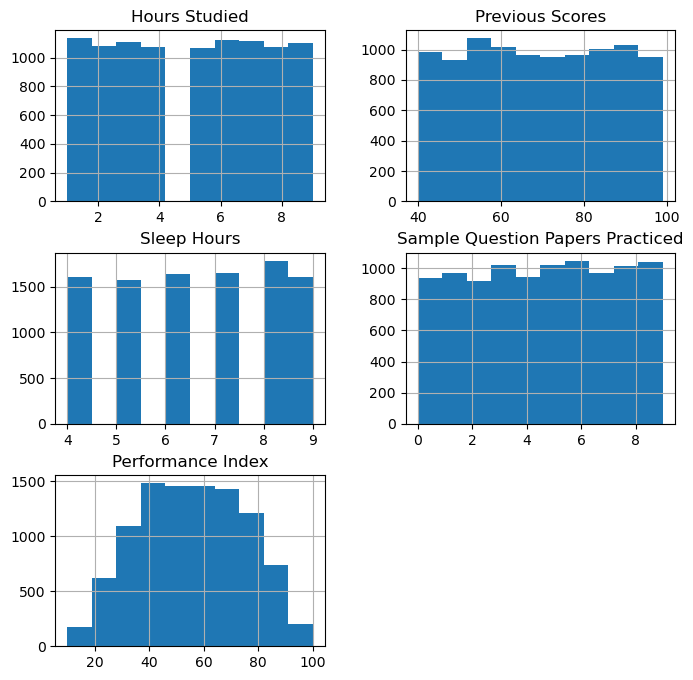

In [9]:
import matplotlib.pyplot as plt

s_df.hist(figsize=(8, 8))
plt.show()

- Object 타입의 범주형 feature인 'Extracurricular Activities' feature를 제외한 나머지 feature들과 target으로 새로운 데이터프레임을 구성합니다.

In [11]:
pre_s_df = s_df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']]
pre_s_df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9868,1,49,4,2,23.0
9869,7,64,8,5,58.0
9870,6,83,8,5,74.0
9871,9,97,7,0,95.0


- corr()을 통해 상관관계를 확인하고 seaborn의 히트맵으로 시각화합니다.

In [12]:
corr = pre_s_df.corr()
corr

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.007975,0.008719,0.915135
Sleep Hours,0.002131,0.007975,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.050352,0.043436,1.000000


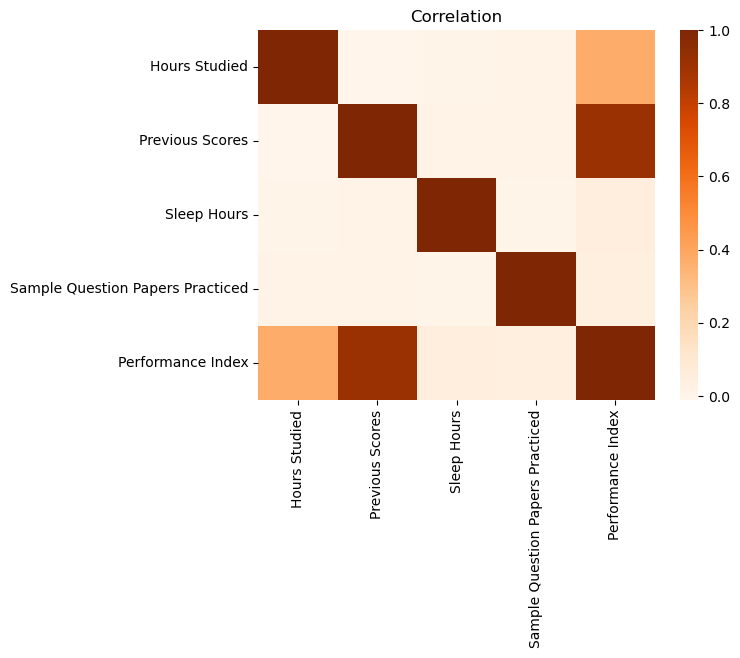

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_hmap = sns.heatmap(corr, cmap='Oranges')
corr_hmap.set_title('Correlation')
plt.show()

- **독립변수 사이의 상관관계가 거의 없음을 알 수 있습니다.**
- 각 독립변수 별로 종속변수와의 상관관계를 내림차순으로 출력해봅니다.

In [14]:
corr['Performance Index'].sort_values(ascending=False)[1:]

Previous Scores                     0.915135
Hours Studied                       0.375332
Sleep Hours                         0.050352
Sample Question Papers Practiced    0.043436
Name: Performance Index, dtype: float64

#### 2. 선형 회귀 분석

- 먼저 sklearn의 선형 회귀 모델을 통해 회귀 분석을 수행합니다.

In [16]:
# Loss 평가 함수 정의
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_s_df.iloc[:, :-1], pre_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [18]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 4.1479, RMSE: 2.0367, MSLE: 0.0021, RMSLE: 0.0461, R2: 0.9885


- 선형 회귀 분석을 수행했을 때 R2가 매우 높게 나타났으므로 해당 데이터는 선형 데이터에 매우 가깝다고 판단됩니다.
- 하지만, R2가 약 0.9885로 과적합의 위험이 있습니다.

#### 3. OLS, VIF 확인
- OLS와 VIF를 확인해봅니다.

In [19]:
from statsmodels.api import OLS

features, targets = pre_s_df.iloc[:, :-1], pre_s_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          2.424e+05
Date:                Thu, 09 May 2024   Prob (F-statistic):                        0.00
Time:                        09:40:41   Log-Likelihood:                         -31480.
No. Observations:                9873   AIC:                                  6.297e+04
Df Residuals:                    9869   BIC:                                  6.300e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

- OLS 상에서 확인해보았을 때, R2는 약 0.990으로 선형 회귀 예측 시와 비슷하며 P>|t|를 보았을 때 모든 독립 변수가 0.000으로 문제가 없었습니다.
- 또한 Durbin-Watson은 약 1.918로 문제가 없었습니다.
- 이번에는 독립변수의 VIF를 구해봅니다.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [21]:
get_vif(features)

,vif_score,feature
0,4.250268,Hours Studied
1,9.893760,Previous Scores
2,9.749961,Sleep Hours
3,3.340544,Sample Question Papers Practiced


- VIF 상에서 큰 문제가 없으므로, 다른 방식으로 과적합 여부를 판단합니다.

#### 4. L1, L2를 통한 규제 적용 여부 판단
- Lasso, Ridge를 통한 규제를 적용하고 비교하기 전에, cross_val_score()를 통해 훈련 데이터를 다시 훈련 데이터와 검증 데이터로 나누어,  
  평균 R2 점수를 구한 뒤 테스트 데이터에 대한 회귀 예측 R2 점수와 비교하여 과적합 여부 및 규제 적용 정도를 판단합니다.

In [68]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

features, targets = pre_s_df.iloc[:, :-1], pre_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
score = cross_val_score(l_r, X_train, y_train, cv=5, scoring='r2')
print(np.round(np.mean(score), 4))

0.9884


In [70]:
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 4.1479, RMSE: 2.0367, MSLE: 0.0021, RMSLE: 0.0461, R2: 0.9885


- 교차 검증 결과 검증 데이터의 평균 r2점수가 약 0.9884가 나왔으며, 테스트 데이터에서 r2는 약 0.9885가 나왔으므로,  
  과적합은 발생하지 않았다고 판단할 수 있겠습니다.

- 모델의 일반화를 위해 규제를 적용합니다.

In [91]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=9, max_iter=10000)
lasso.fit(X_train, y_train)

Lasso(alpha=9, max_iter=10000)

In [92]:
prediction = lasso.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 17.6517, RMSE: 4.2014, MSLE: 0.0097, RMSLE: 0.0985, R2: 0.9510


- 다음은 Ridge를 통한 규제를 적용해봅니다.

In [89]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=50000, max_iter=10000)
ridge.fit(X_train, y_train)

Ridge(alpha=50000, max_iter=10000)

In [90]:
prediction = ridge.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 17.6788, RMSE: 4.2046, MSLE: 0.0096, RMSLE: 0.0978, R2: 0.9509


#### **📌 5. 요약**

- 중복행 삭제 등 기본적인 전처리만 수행한 후, 범주형 데이터인 'Extracurricular Activities'를 삭제했습니다.
- 남은 4개의 독립변수 사이의 상관관계는 거의 존재하지 않았으며,  
  이 중 2개의 독립변수가 종속변수와 강한 상관관계를 보였던 반면 나머지 2개는 약한 상관관계를 보였습니다.  
  
- 이후 sklearn의 LinearRegression 모델을 통해 선형 회귀 예측을 수행했을 때 R2가 약 0.9885로 매우 높게 나타났습니다.
- 따라서 분석 대상 데이터가 선형 데이터에 가깝다고 판단하였고 과적합 발생 여부를 판단하기 위해 먼저 OLS 및 VIF를 확인하였지만,  
  별다른 문제를 발견하지 못했습니다.
- 훈련 데이터를 다시 훈련 데이터와 검증 데이터로 나누어 교차 검증을 수행함으로써 과적합 여부 및 규제 적용 정도를 판단하고자 하였습니다.
- 교차 검증 결과 원래의 훈련 데이터에서 평균 r2점수는 약 0.9884, 테스트 데이터에서 r2점수는 약 0.9885로 비슷하게 높게 나타났습니다.
- 과적합은 발생하지 않았다고 판단되지만, 모델의 일반화를 위해 테스트 데이터에서의 r2를 약 0.95 정도로 낮추기 위한 규제를 적용했습니다.
- Lasso(L1 Norm)에서는 alpha 값을 9, max_iter를 10000으로 적용하였을 때 약 0.9510의 r2를 나타냈으며,  
  Ridge(L2 Norm)에서는 alpha 값을 50000, max_iter를 10000으로 적용하였을 때 약 0.9509의 r2를 나타냈습니다.